# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

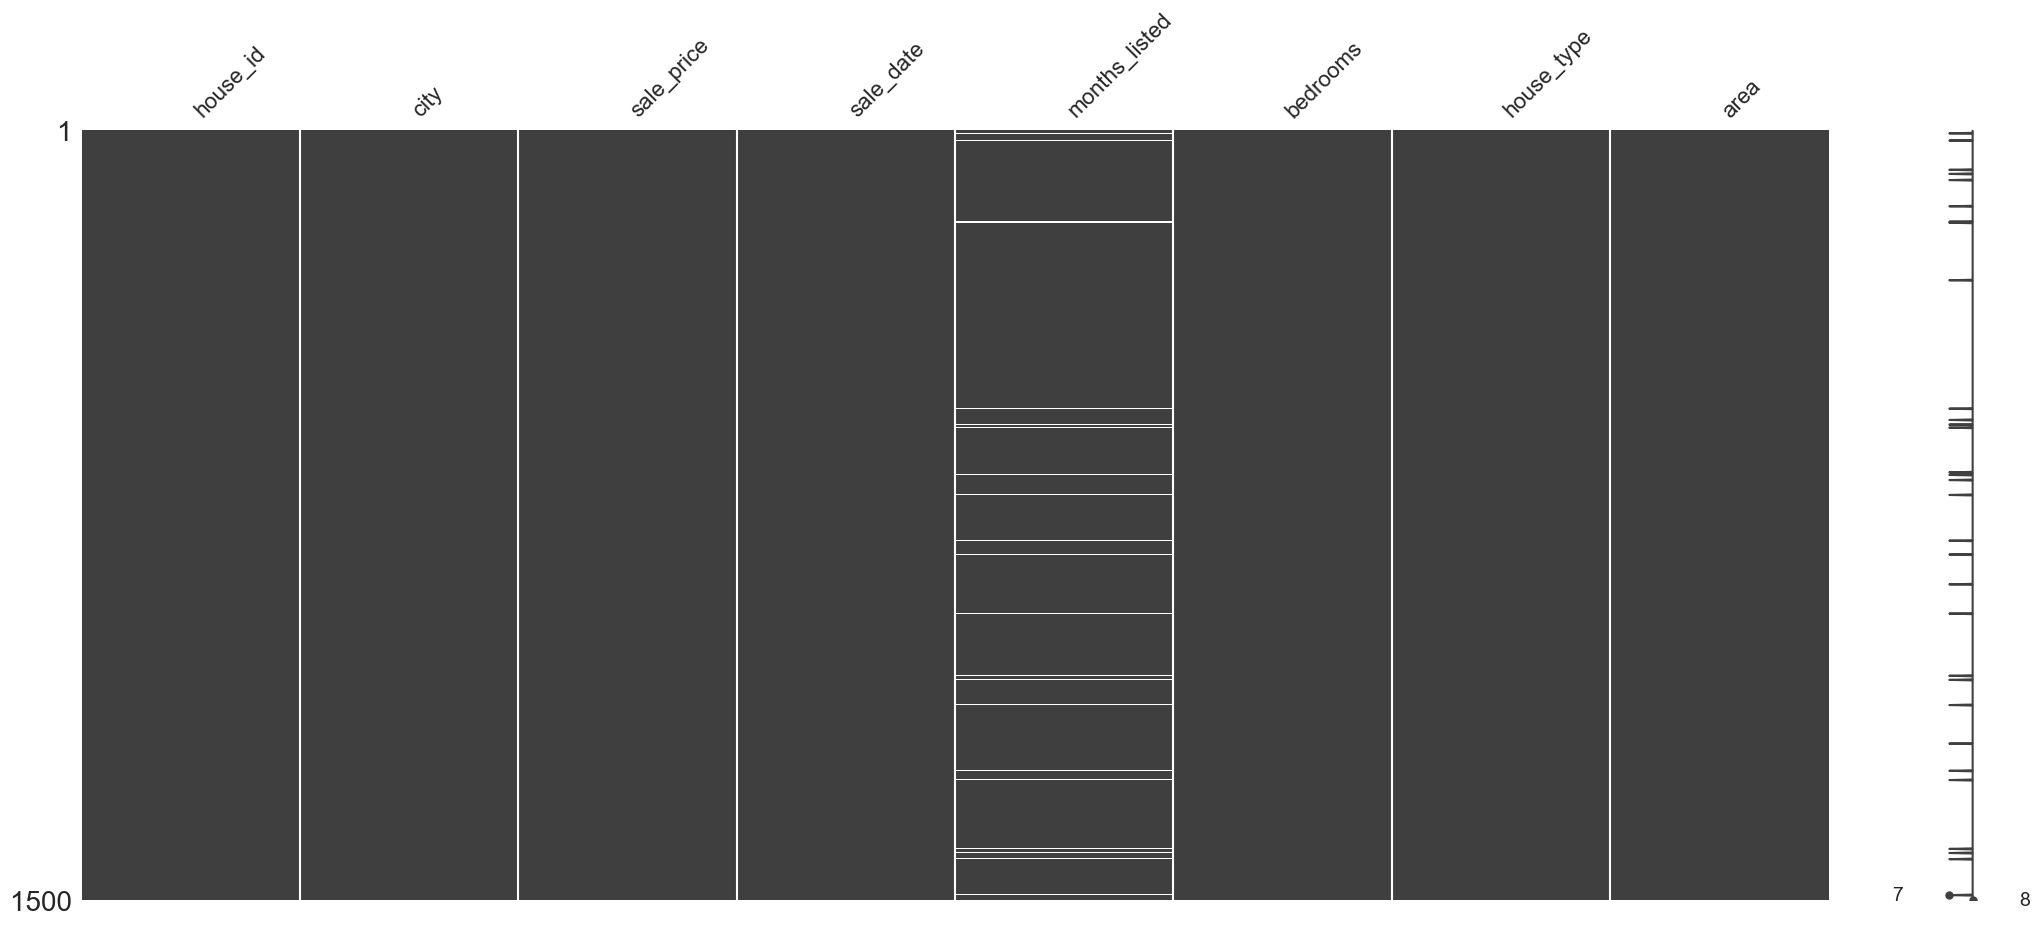

city
Silvertown    517
Teasdale      366
Poppleton     362
Riverford     182
--             73
Name: count, dtype: int64
73


In [3]:
# Use this cell to write your code for Task 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Read data
house_sales = pd.read_csv("house_sales.csv")

# Examine missing distribution
msno.matrix(house_sales)
plt.show()

# Look at city value_counts
print(house_sales["city"].value_counts())

# Assign number of missing values
missing_city = house_sales["city"].str.contains("--").sum()
missing_city = int(missing_city)
print(missing_city)

# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

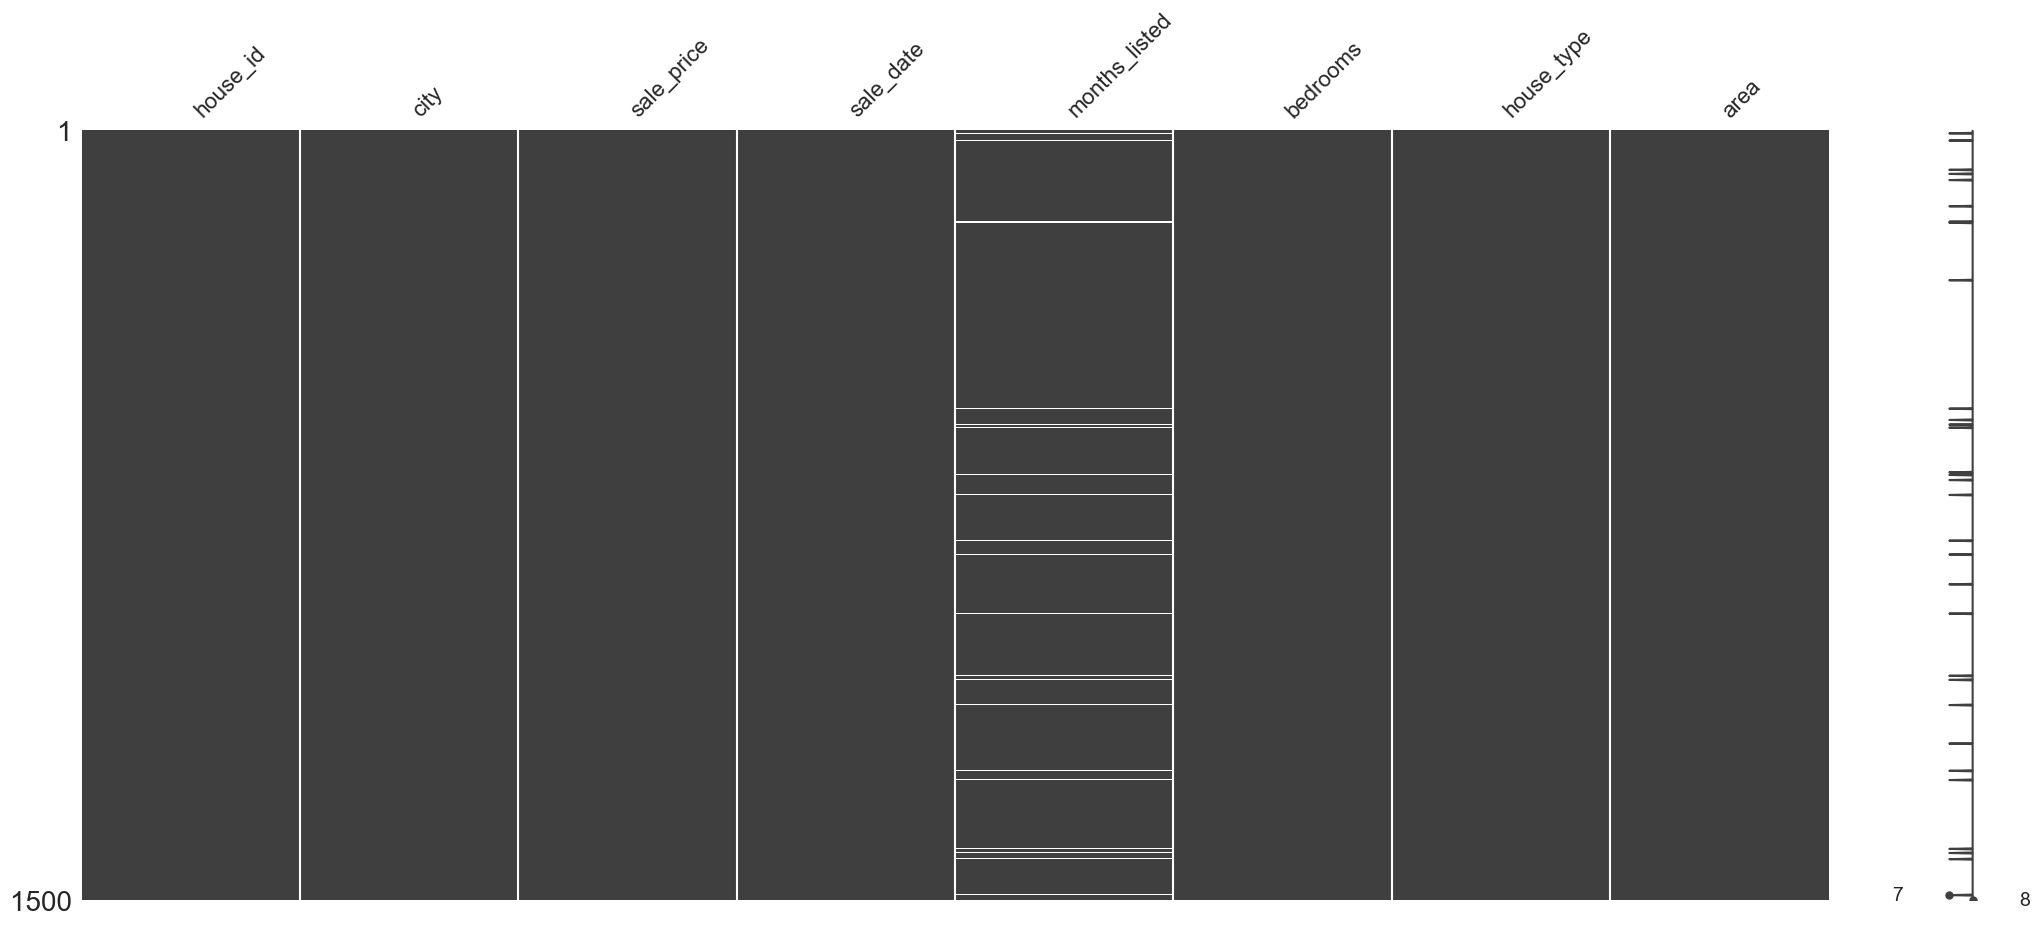

city
Silvertown    517
Teasdale      366
Poppleton     362
Riverford     182
Unknown        73
Name: count, dtype: int64
31
5.9


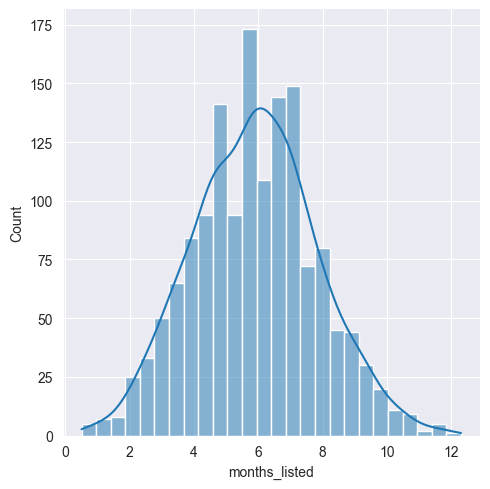

0
0
house_id                  int64
city                   category
sale_price                int64
sale_date        datetime64[ns]
months_listed           float64
bedrooms                  int64
house_type             category
area                    float64
dtype: object
      house_id        city  sale_price  sale_date  months_listed  bedrooms  \
0      1217792  Silvertown       55943 2021-09-12            5.4         2   
1      1900913  Silvertown      384677 2021-01-17            6.3         5   
2      1174927   Riverford      281707 2021-11-10            6.9         6   
3      1773666  Silvertown      373251 2020-04-13            6.1         6   
4      1258487  Silvertown      328885 2020-09-24            8.7         5   
...        ...         ...         ...        ...            ...       ...   
1495   1123892   Riverford      198661 2022-02-17            7.3         5   
1496   1327295   Poppleton      358304 2020-10-10            6.2         6   
1497   1058161   Riverfo

In [4]:
# Use this cell to write your code for Task 2
# Read data
house_sales = pd.read_csv("house_sales.csv")

# Examine missing distribution
msno.matrix(house_sales)
plt.show()

# Clean the city column
house_sales["city"] = house_sales["city"].str.replace("--", "Unknown")
print(house_sales["city"].value_counts())
house_sales["city"] = house_sales["city"].astype("category")

# No missing values for sale_price column

# No missing values for sale_date column
house_sales["sale_date"] = pd.to_datetime(house_sales["sale_date"])

# Clean months_listed column
print(house_sales["months_listed"].isna().sum())
# Calculate mean number of months listed
missing_months = house_sales["months_listed"].isna()
mean_months = house_sales[~missing_months]["months_listed"].mean().round(1)
print(mean_months)
house_sales["months_listed"] = np.where(house_sales["months_listed"].isna(), mean_months, house_sales["months_listed"])
sns.displot(house_sales["months_listed"], kde=True)
plt.show()

# No missing values for bedrooms column

# Clean house_type column
print(house_sales["house_type"].isna().sum())
house_sales["house_type"] = np.where(house_sales["house_type"] == "Det.", "Detached", house_sales["house_type"])
house_sales["house_type"] = np.where(house_sales["house_type"] == "Semi", "Semi-detached", house_sales["house_type"])
house_sales["house_type"] = np.where(house_sales["house_type"] == "Terr.", "Terraced", house_sales["house_type"])
house_sales["house_type"].value_counts()
house_sales["house_type"] = house_sales["house_type"].astype("category").cat.as_ordered()

# Clean area column
print(house_sales["area"].isna().sum())
house_sales["area"] = house_sales["area"].str.replace("sq.m.", "", regex=False)
house_sales["area"] = house_sales["area"].str.strip()
house_sales["area"] = house_sales["area"].astype("float")
house_sales["area"].value_counts()

# Examine column data types
print(house_sales.dtypes)

# Get output DataFrame
clean_data = house_sales
print(clean_data)

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [5]:
# Use this cell to write your code for Task 3
house_sales = pd.read_csv("house_sales.csv")

price_by_rooms = house_sales.groupby("bedrooms")["sale_price"].agg(["mean", "var"])
price_by_rooms.rename(columns={"mean": "avg_price", "var": "var_price"}, inplace=True)
price_by_rooms.reset_index(inplace=True)
price_by_rooms["avg_price"] = price_by_rooms["avg_price"].round(1)
price_by_rooms["var_price"] = price_by_rooms["var_price"].round(1)
print(price_by_rooms)
price_by_rooms

   bedrooms  avg_price     var_price
0         2    67076.4  5.652896e+08
1         3   154665.1  2.378289e+09
2         4   234704.6  1.725211e+09
3         5   301515.9  2.484328e+09
4         6   375741.3  3.924432e+09


,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [6]:
# Use this cell to write your code for Task 4
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE

# Load training and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("validation.csv")

# Convert sale dates to days since Jan 1 1970
train["sale_date"] = pd.to_datetime(train["sale_date"]).astype("int64") // (10**9 * 86400) # 86400 seconds in a day
test["sale_date"] = pd.to_datetime(test["sale_date"]).astype("int64") // (10**9 * 86400) # 86400 seconds in a day

# Set up train and test sets
X_train = train.drop("sale_price", axis=1)
y_train = train["sale_price"]
X_test = test

# Convert categoricals to one-hot encoded dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Drop house_id from features
X_train = X_train.drop("house_id", axis=1)
X_test = X_test.drop("house_id", axis=1)

# Instantiate a scaler and a model
scaler = StandardScaler()
linreg = LinearRegression()

# Create a pipeline
pipeline = make_pipeline(scaler, linreg)

pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
print("RMSE train: ", rmse_train)

# Check cross validation error for model bias/variance
linreg_cv = LinearRegression()
scaler_cv = StandardScaler()

pipeline_cv = make_pipeline(scaler_cv, linreg_cv)

cv_results = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
rmse_cv = (np.mean(np.sqrt(cv_results)))
print("RMSE CV: ", rmse_cv)

# Predict sale prices using trained model
y_pred = pipeline.predict(X_test)

# Create DataFrame for results
base_result = pd.DataFrame({"house_id": test["house_id"], "price": y_pred})
print(base_result)

RMSE train:  21524.01063519971
RMSE CV:  21817.81890112484
     house_id          price
0     1331375  122032.079877
1     1630115  303641.162563
2     1645745  384158.883809
3     1336775  124233.620349
4     1888274  271904.829427
..        ...            ...
295   1986255  350863.775771
296   1896276  370042.895228
297   1758223  259463.507478
298   1752010  168533.262224
299   1651404  390921.773899

[300 rows x 2 columns]


# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [7]:
# Use this cell to write your code for Task 5
from sklearn.ensemble import RandomForestRegressor

# Load training and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("validation.csv")

# Convert sale dates to days since Jan 1 1970
train["sale_date"] = pd.to_datetime(train["sale_date"]).astype("int64") // (10**9 * 86400) # 86400 seconds in a day
test["sale_date"] = pd.to_datetime(test["sale_date"]).astype("int64") // (10**9 * 86400) # 86400 seconds in a day

# Set up train and test sets
X_train = train.drop("sale_price", axis=1)
y_train = train["sale_price"]
X_test = test

# Convert categoricals to one-hot encoded dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Drop house_id from features
X_train = X_train.drop("house_id", axis=1)
X_test = X_test.drop("house_id", axis=1)

# Instantiate a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=4, max_samples=0.8, random_state=42)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
rmse_rf = MSE(y_train, y_pred_train)**(1/2)
print("RMSE RF: ", rmse_rf)

# Check cross validation error for model bias/variance
rf_cv = RandomForestRegressor(n_estimators=200, max_depth=4, max_samples=0.8, random_state=42)

rf_cv_results = -cross_val_score(rf_cv, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
rmse_rf_cv = np.mean(np.sqrt(rf_cv_results))
print("RMSE RF CV: ", rmse_rf_cv)

# Predict sale prices using trained model
y_pred = rf.predict(X_test)

# Create DataFrame for results
compare_result = pd.DataFrame({"house_id": test["house_id"], "price": y_pred})
print(compare_result)

RMSE RF:  21597.938021976646
RMSE RF CV:  22819.03759753057
     house_id          price
0     1331375   73735.322970
1     1630115  293807.436624
2     1645745  363438.370867
3     1336775  117070.265465
4     1888274  264437.785589
..        ...            ...
295   1986255  359337.854410
296   1896276  361262.607586
297   1758223  255555.313156
298   1752010  172932.118170
299   1651404  421734.081227

[300 rows x 2 columns]
